In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import sklearn.datasets as datasets
import sklearn.neighbors as neighbors
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakaraprasetyo","key":"b2595d3a5671f38c7a5b96ede39011d0"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 1.31MB/s]


In [ ]:
!unzip heart-disease-uci.zip

Archive:  heart-disease-uci.zip
  inflating: heart.csv               


In [ ]:
heart = pd.read_csv("heart.csv")

In [ ]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df_viz = heart.copy()

In [ ]:
df_viz

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
bins= [0,20,30,40,50, 60, 110]
labels = ['Less then Twenties','Twenties','Thirties','Forties','Fifties','More than Fifties']
df_viz['age_group'] = pd.cut(df_viz['age'], bins=bins, labels=labels, right=False)

In [ ]:
df_viz.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,More than Fifties
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Thirties
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Forties
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Fifties
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Fifties
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,Fifties
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,Fifties
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,Forties
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,Fifties
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,Fifties


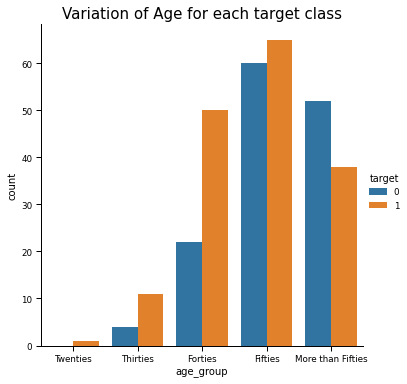

In [ ]:
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 15,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df_viz, x = 'age_group', hue = 'target', order = df_viz['age_group'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

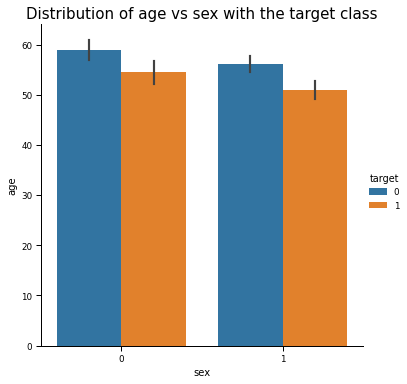

In [ ]:
sns.catplot(kind = 'bar', data = df_viz, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [ ]:
numeric_column = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [ ]:
heart[numeric_column].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
numeric_column_filtered = ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [ ]:
heart[heart.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


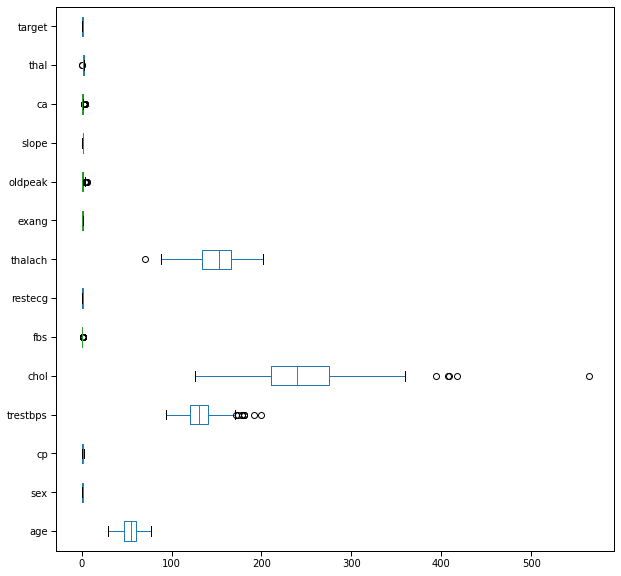

In [ ]:
heart.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(10,10),vert=False)

In [ ]:
Q1 = heart[numeric_column].quantile(0.25)
Q3 = heart[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 age          47.5
sex           0.0
cp            0.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     133.5
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.25, dtype: float64

Q3:
 age          61.0
sex           1.0
cp            2.0
trestbps    140.0
chol        274.5
fbs           0.0
restecg       1.0
thalach     166.0
exang         1.0
oldpeak       1.6
slope         2.0
ca            1.0
thal          3.0
target        1.0
Name: 0.75, dtype: float64

IQR:
 age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64

Min:
 age          27.25
sex          -1.50
cp           -3.00
trestbps     90.00
chol        115.75
fbs           0.00
restecg      -1.50
thalach      84.75
exang       

In [ ]:
non_outlier_df = heart.copy()
for x in numeric_column:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [ ]:
non_outlier_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1


In [ ]:
non_outlier_df.shape

(228, 14)

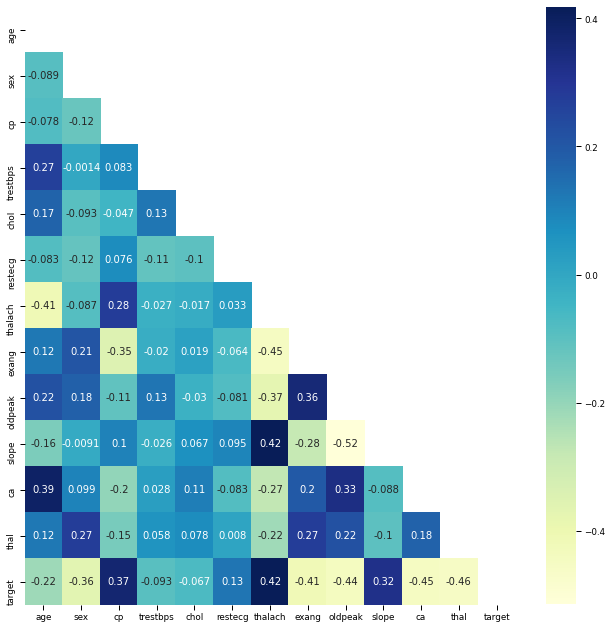

In [ ]:
correlation_between_column = non_outlier_df[numeric_column_filtered].corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":10},mask=upper_triangle_corr)

**Naive Bayes**

In [ ]:
X = heart.iloc[:, :-1].values
y = heart.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_y_pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
nb_cm_test = confusion_matrix(nb_y_pred, y_test)
nb_y_pred_train = nb.predict(X_train)
nb_cm_train = confusion_matrix(nb_y_pred_train, y_train)

**Decision Tree**

In [ ]:
X = heart.iloc[:, :-1].values
y = heart.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
dt_cm_test = confusion_matrix(dt_y_pred, y_test)
dt_y_pred_train = dt.predict(X_train)
dt_cm_train = confusion_matrix(dt_y_pred_train, y_train)

**Random Forest**

In [ ]:
X = heart.iloc[:, :-1].values
y = heart.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
rf_cm_test = confusion_matrix(rf_y_pred, y_test)
rf_y_pred_train = rf.predict(X_train)
rf_cm_train = confusion_matrix(rf_y_pred_train, y_train)

In [ ]:
print()
print('Accuracy for training set for Naive Bayes = {}'.format((nb_cm_train[0][0] + nb_cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((nb_cm_test[0][0] + nb_cm_test[1][1])/len(y_test)))
print()
print('Accuracy for training set for Decision Tree = {}'.format((dt_cm_train[0][0] + dt_cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((dt_cm_test[0][0] + dt_cm_test[1][1])/len(y_test)))
print()
print('Accuracy for training set for Random Forest = {}'.format((rf_cm_train[0][0] + rf_cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((rf_cm_test[0][0] + rf_cm_test[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes = 0.8443396226415094
Accuracy for test set for Naive Bayes = 0.8021978021978022

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7472527472527473

Accuracy for training set for Random Forest = 0.9811320754716981
Accuracy for test set for Random Forest = 0.8131868131868132


**ROC AUC**

In [ ]:
y_score = nb.fit(X_train, y_train).predict_proba(X_test)

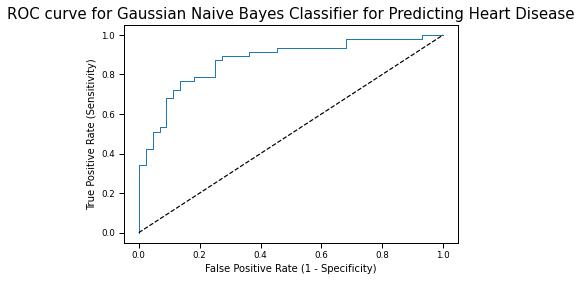

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Heart Disease')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, nb_y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7998


In [ ]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(nb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8933


**K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.77272727 0.77272727 0.80952381 0.9047619  0.9047619  0.76190476
 0.95238095 0.76190476 0.76190476 0.85714286]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8260
